## Iris Dataset

# Part A

importing the libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


downloading dataset from remote repo

In [32]:
!wget "https://archive.ics.uci.edu/static/public/53/iris.zip"

--2023-07-28 16:07:29--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-07-28 16:07:29 (834 MB/s) - ‘iris.zip’ saved [3738]



unziping the downloaded dataset

In [33]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [34]:
dataa = pd.read_csv("iris.data")
data = dataa

In [35]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


As per the data we can not use the columns data as numbers as mentioned above so below information we get from the link given in assignment doc.

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:   Iris Setosa ,Iris Versicolour, Iris Virginica




so we are converting them as sl, sw, pl, pw and class respectively as column names

feature engineering technique applying here


In [36]:
data['Iris-setosa'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
data = pd.DataFrame(data)
data.columns=['sl','sw','pl','pw','class']
data = pd.DataFrame(data)


Printing at least 5 rows for sanity check to identify all the features present in the dataset and
if the target matches with them

In [39]:
data.head(5)

,sl,sw,pl,pw,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


now you can see all columns are properly labled

Printing the description and shape of the dataset.

In [44]:
data.shape


(149, 5)

the data has 149 rows and 5 columns

In [45]:
data.describe()

,sl,sw,pl,pw
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


here you can see the mean, median(50%),standard devitation, Q1(25%), Q3(75%) for IQR and all

visualization to get an insight about the dataset.

 Correlations between data

<ipython-input-52-3c29820da1b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr(), cmap = "Blues")


<Axes: >

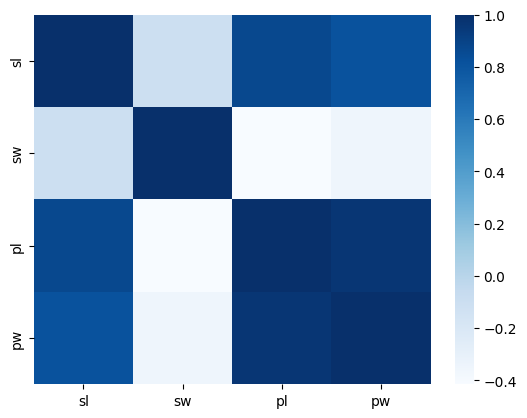

In [52]:
# sn.heatmap(data.corr(),cmap="Red")
sn.heatmap(data.corr(), cmap = "Blues")

pairplot between every columns

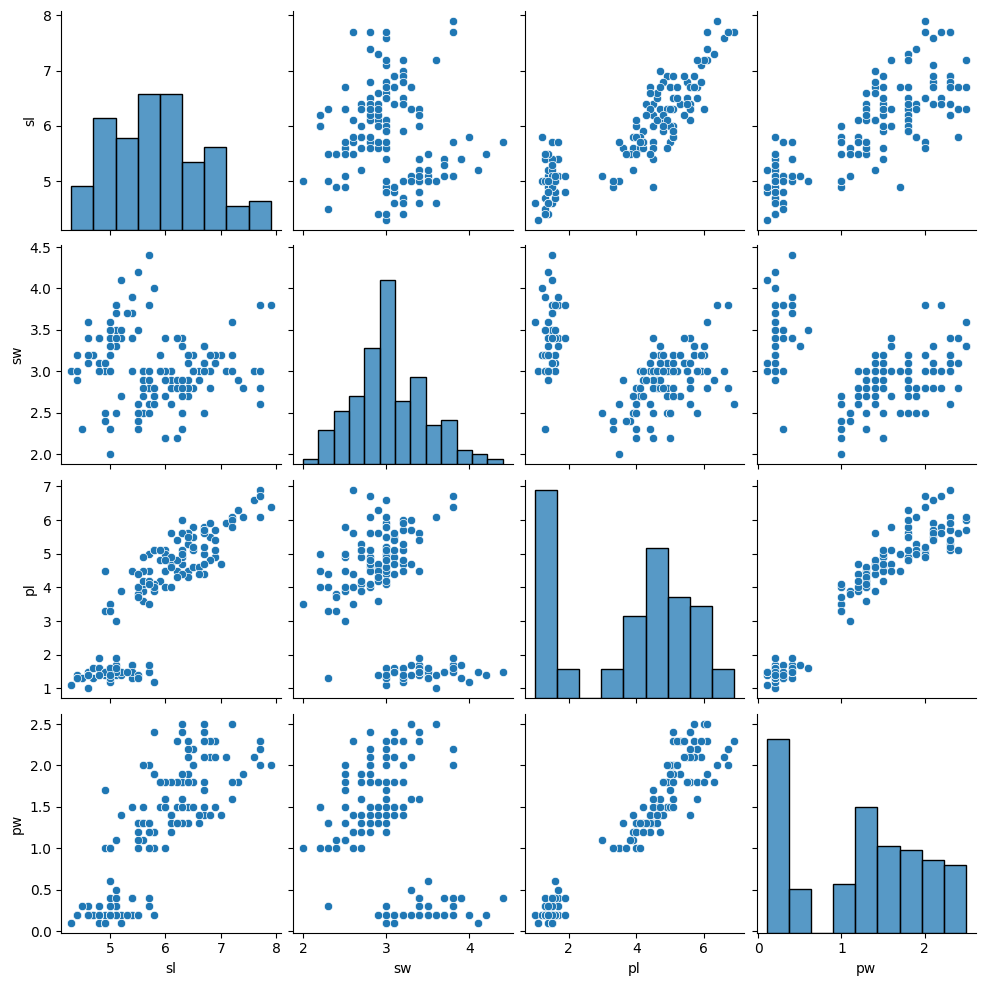

In [53]:
sn.pairplot(data)

exploring the data and checking the insights that can be drawn from the dataset.

checking the Pearson correlation

In [59]:
# data_1 = data.iloc[:4]
print(data.corr())

          sl        sw        pl        pw
sl  1.000000 -0.103784  0.871283  0.816971
sw -0.103784  1.000000 -0.415218 -0.350733
pl  0.871283 -0.415218  1.000000  0.962314
pw  0.816971 -0.350733  0.962314  1.000000


<ipython-input-59-101bb31a98d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


<ipython-input-57-f9ddb87c156a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


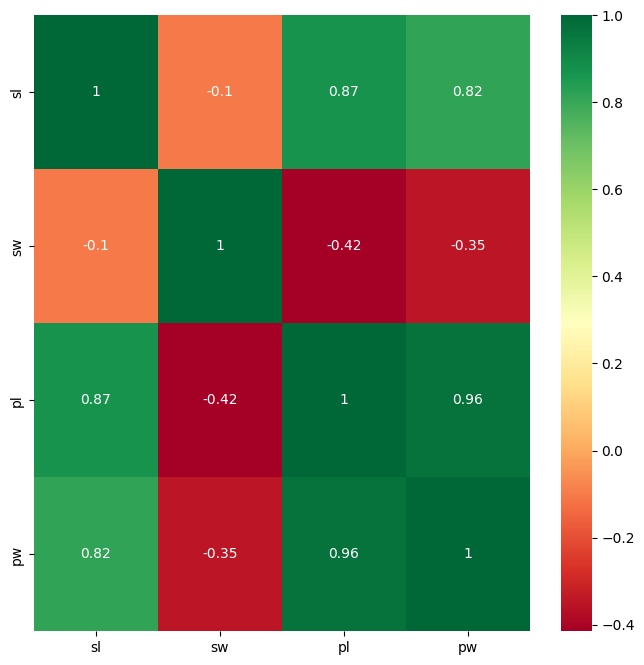

In [57]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sn.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

from the above corelation we can see that there is a higher corelation(0.96) between pl and pw so both are may carry similar information so we can remove them for the future analysis

###pre-processing

checking for the null values

In [62]:
data.isnull().sum()

sl       0
sw       0
pl       0
pw       0
class    0
dtype: int64

here we see that no columns has the null values so we no need to worry to handle the data missing

checking the outliers for sl

In [77]:
data.shape

(146, 5)

<Axes: xlabel='sl'>

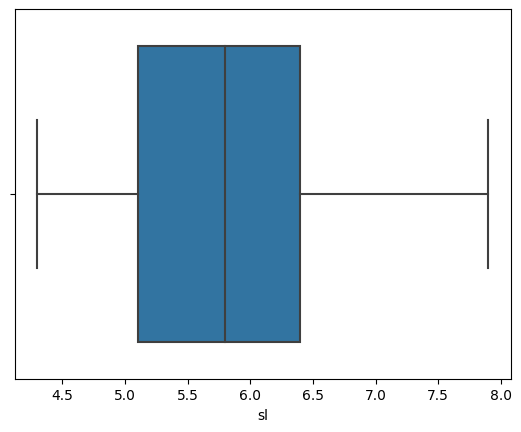

In [79]:
sn.boxplot(x=data['sl'])

boxplots show the proper distribution of of 25 percentile and 75 percentile of the feature of sl

similerly we can check for the other numerical columns

In [75]:
Q1= data.sl.quantile(0.25)
Q3 = data.sl.quantile(0.75)
IQR = Q1-Q3
lb = Q1-1.5*IQR
hb = Q3+1.5*IQR
#getting only the data ponts between lb and hb
data_2 = data[(data.sl <lb)|(data.sl < hb)]

In [76]:
data_2.shape

(134, 5)

you can see before removing outlier data set size was (146,5) after removing the outlier for sl dataset size is (134,5) which means 12 data points were lies outside the lower bound and upper bound. sometime it's not necessary to remove outliers examples it's a small data set if we remove the data points accuracy will be reduced

<Axes: xlabel='sl'>

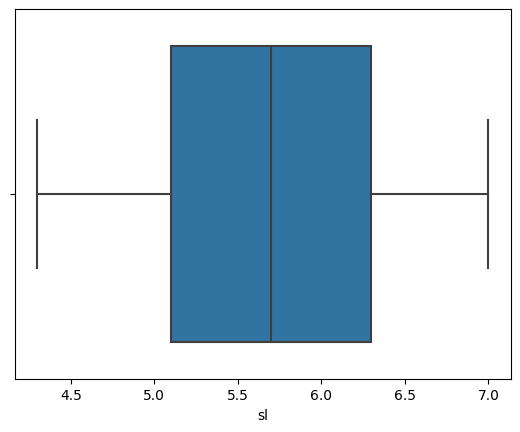

In [78]:
sn.boxplot(x=data_2['sl'])

In [66]:
data.duplicated().sum()

3

here see we have 3 duplicates  no use from these so wil remove them

In [71]:
data = data.drop_duplicates()

In [72]:
data.duplicated().sum()

0

here you can see no duplicates now , so we are good now to choose a model

In [73]:
data.count()

sl       146
sw       146
pl       146
pw       146
class    146
dtype: int64

feature engineering technique is applied in the begining itsels like renaming the columns to proper names for the understanding.

here for target/predict  class attribute is categorical so we need to convert it to numerical for stastistical computation so apply labelEncoding.

In [81]:
data.head()

,sl,sw,pl,pw,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [92]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(data['class'])
data['class']  = encoder.fit_transform(data['class'])

In [94]:
data['class'].unique()

array([0, 1, 2])

you can see categorical data is encoded to numerical data

In [93]:
data.head()

,sl,sw,pl,pw,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


after encoding the class variable corelation as below

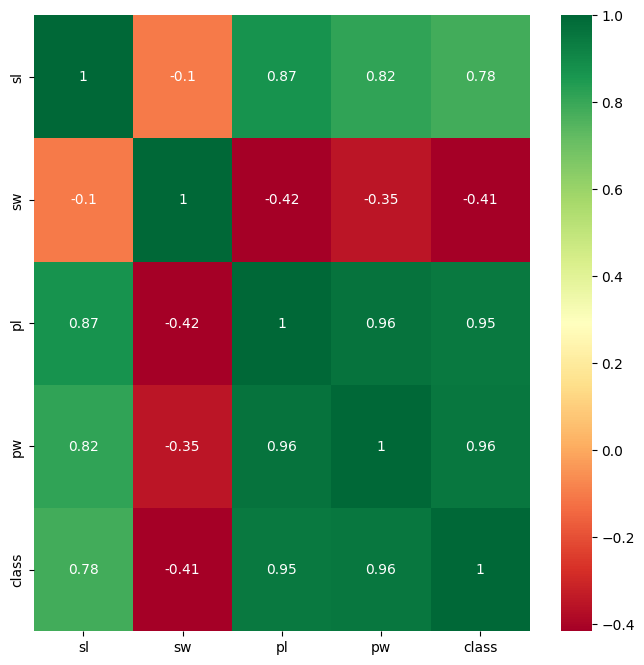

In [116]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sn.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

will split the data set into test and train sets

In [113]:
X = data.iloc[ : , :4]
y = data.iloc[:,-1]

x has feature variables

In [114]:
X.head()

,sl,sw,pl,pw
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [112]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

y has target variable

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


now data is ready, lets bring/normalize all data points to same scale by applying the normalization/standardscaler function.

In [117]:
from sklearn.preprocessing import StandardScaler

#Apply feature scaling to the target variables
#this is already done we can skip this
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

#Apply feature scaling to the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Part B

##so first Model Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred = regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [121]:
y_pred

array([-1.18e-01,  2.31e+00, -1.26e-01, -7.68e-02,  3.83e-06,  1.60e+00,
       -5.26e-03,  1.58e+00,  1.03e+00, -2.73e-02, -1.19e-01,  2.21e+00,
        1.91e+00,  9.31e-01,  2.08e+00, -8.31e-02,  1.34e+00,  2.08e+00,
       -1.33e-02,  1.17e+00,  1.18e+00,  1.75e+00, -1.18e-01,  1.63e+00,
       -1.64e-01,  1.21e+00,  9.90e-01,  2.05e+00,  2.09e+00, -1.34e-01])

These values represent the predicted target variable (y) for each corresponding row in X_test. For example, the first value (-0.118) is the predicted target value for the first row in X_test, the second value (2.31) is the predicted target value for the second row in X_test, and so on.

Since the target variable in your regression problem is continuous, the model's predictions are real numbers that can be positive or negative, and they are not limited to specific classes. The model aims to minimize the difference between the predicted values and the actual target values (y_test) during the training process.

to check the performance of the model here we go



In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.049255485352694486
Mean Absolute Error (MAE): 0.15886556587552503
R-squared (R2): 0.9286152386192834


Lower MSE and MAE values indicate better performance, as they represent smaller prediction errors.
R2 ranges from 0 to 1, with 1 being a perfect fit. Higher R2 values indicate that the model explains a larger proportion of the variance in the target variable.

training accuracy and loss values

In [126]:
print("Training set score",regressor.score(X_train,y_train))
print("Test set score",regressor.score(X_test,y_test))


Training set score 0.9262916450433719
Test set score 0.9286152386192834


here you can notice that test value is better than train value this indicates our model well trained and predicted well

In [129]:
new_frame = pd.DataFrame({'Actual':list(y_test),'Predicted':list(y_pred)},columns = ['Actual','Predicted'])
new_frame.head()

,Actual,Predicted
0,0,-0.117547
1,2,2.306420
2,0,-0.126352
3,0,-0.076770
4,0,0.000004


In [130]:
#Save new_frame to a CSV file
new_frame.to_csv('LinearRegressionPredictions.csv', index=False)